In [11]:
import pandas as pd
import pickle
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import matplotlib.pyplot as plt

In [12]:
# Cargar el modelo guardado
with open('mejor_modelo_calidad_lead.pkl', 'rb') as file:
    mejor_modelo = pickle.load(file)

In [13]:
# Definir una función para cargar el modelo y calcular el score
def calcular_puntaje(df):
    # Preprocesar los datos
    X = df.drop(['Calidad_de_lead__c'], axis=1)
    
    # Normalizar los datos
    escalador = StandardScaler()
    X_normalizado = escalador.fit_transform(X)
    
    # Predecir usando el modelo
    puntajes_raw = mejor_modelo.predict(X_normalizado)
    
    # Obtener la importancia de las características
    importancias = mejor_modelo.feature_importances_
    
    # Calcular los puntajes basados en la importancia de las características
    puntajes_importancia = X.dot(importancias)
    
    # Escalar las puntuaciones entre 0 y 100
    escalador_minmax = MinMaxScaler(feature_range=(0, 100))
    puntajes_importancia_escalados = escalador_minmax.fit_transform(puntajes_importancia.values.reshape(-1, 1))
    
    # Agregar una nueva columna con los puntajes al DataFrame original
    df['Puntaje_calculado'] = puntajes_importancia_escalados
    
    return df

In [14]:
df = pd.read_csv('Datos_Train_Calidad_Lead_Clean.csv')
df.head()

,Cuota_Inicial__c,Presupuesto_inmueble_a_comprar__c,ingresos_totales__c,Ingresos_familiares__c,Calidad_de_lead__c,picklist_ciudad__c
0,7000000.0,3.000000e+08,5000000.0,5000000.0,-1,1
1,2000000.0,2.000000e+08,2800000.0,2800000.0,-1,1
2,4000000.0,2.488307e+08,1000000.0,1000000.0,-1,1
3,1000000.0,1.800000e+07,1800000.0,1800000.0,-1,1
4,0.0,1.700000e+08,3000000.0,3000000.0,-1,1


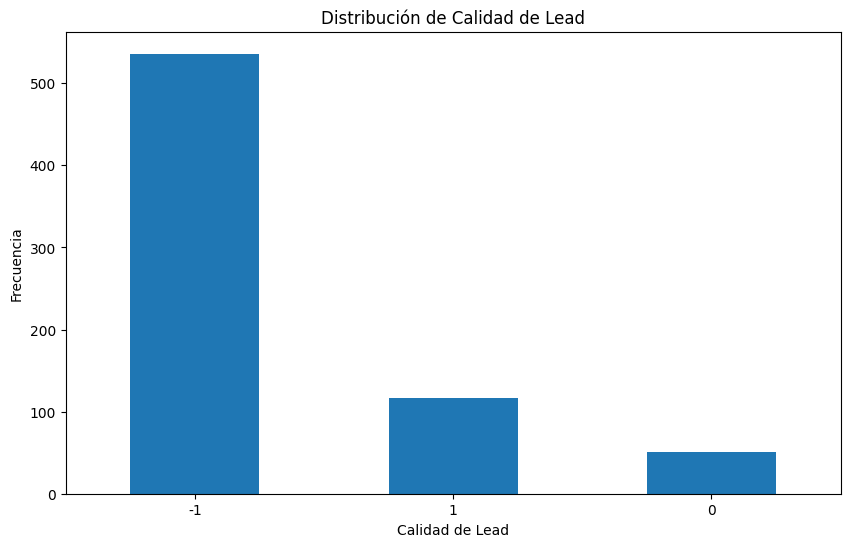

In [20]:
calidad_counts = df['Calidad_de_lead__c'].value_counts()

# Crear el histograma
plt.figure(figsize=(10, 6))
calidad_counts.plot(kind='bar')
plt.title('Distribución de Calidad de Lead')
plt.xlabel('Calidad de Lead')
plt.ylabel('Frecuencia')
plt.xticks(rotation=0)
plt.show()

In [16]:
df_con_puntajes = calcular_puntaje(df)
df_con_puntajes.head()

,Cuota_Inicial__c,Presupuesto_inmueble_a_comprar__c,ingresos_totales__c,Ingresos_familiares__c,Calidad_de_lead__c,picklist_ciudad__c,Puntaje_calculado
0,7000000.0,3.000000e+08,5000000.0,5000000.0,-1,1,4.274795
1,2000000.0,2.000000e+08,2800000.0,2800000.0,-1,1,2.779881
2,4000000.0,2.488307e+08,1000000.0,1000000.0,-1,1,3.472114
3,1000000.0,1.800000e+07,1800000.0,1800000.0,-1,1,0.284703
4,0.0,1.700000e+08,3000000.0,3000000.0,-1,1,2.327299


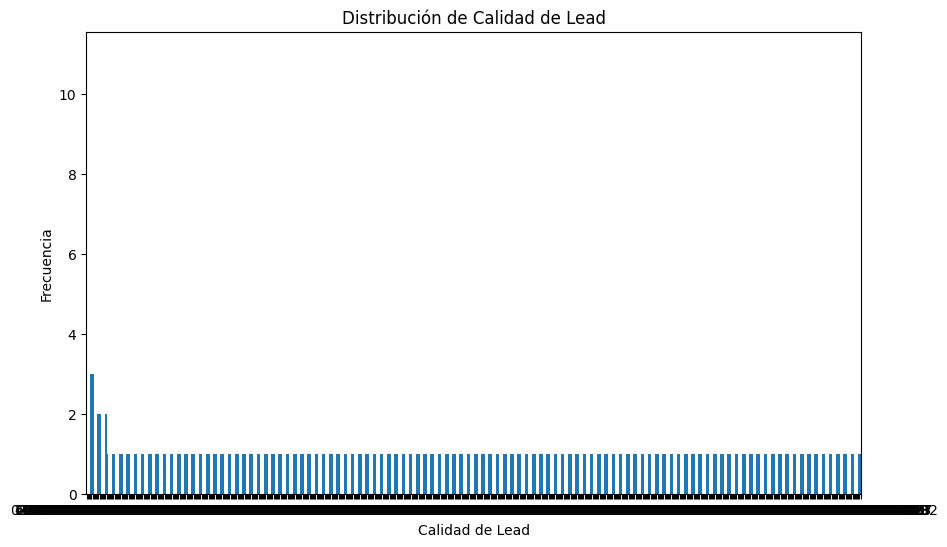

In [21]:
puntaje_count = df['Puntaje_calculado'].value_counts()

# Crear el histograma
plt.figure(figsize=(10, 6))
puntaje_count.plot(kind='bar')
plt.title('Distribución de Calidad de Lead')
plt.xlabel('Calidad de Lead')
plt.ylabel('Frecuencia')
plt.xticks(rotation=0)
plt.show()